In [18]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\GPS\Downloads\tags.csv')
df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [20]:
movie_titles = pd.read_csv(r'C:\Users\GPS\Downloads\movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
ratings = pd.read_csv(r'C:\Users\GPS\Downloads\ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [38]:
df = pd.merge(df,movie_titles,on='movieId')
df = pd.merge(df,ratings,on='movieId')
df.head()

,userId_x,movieId,tag,timestamp_x,title_x,genres_x,title_y,genres_y,title_x,genres_x,title_y,genres_y,title,genres,userId_y,rating,timestamp_y
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,2,5.0,1445714980
1,2,60756,funny,1445714994,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,18,3.0,1455749449
2,2,60756,funny,1445714994,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,62,3.5,1528934376
3,2,60756,funny,1445714994,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,68,2.5,1269123243
4,2,60756,funny,1445714994,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,Step Brothers (2008),Comedy,73,4.5,1464196221


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [39]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Woman Under the Influence, A (1974)    5.0
Who Killed Chea Vichea? (2010)         5.0
More (1998)                            5.0
Come and See (Idi i smotri) (1985)     5.0
Crossing Delancey (1988)               5.0
Name: rating, dtype: float64

In [40]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()


title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Name: rating, dtype: int64

In [41]:
theratings = pd.DataFrame(df.groupby('title')['rating'].mean())
theratings.head()

,rating
title,
(500) Days of Summer (2009),3.666667
...And Justice for All (1979),3.166667
10 Cloverfield Lane (2016),3.678571
10 Things I Hate About You (1999),3.527778
101 Dalmatians (1996),3.074468


In [42]:
theratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
theratings.head()

,rating,num of ratings
title,,
(500) Days of Summer (2009),3.666667,336
...And Justice for All (1979),3.166667,3
10 Cloverfield Lane (2016),3.678571,28
10 Things I Hate About You (1999),3.527778,54
101 Dalmatians (1996),3.074468,94


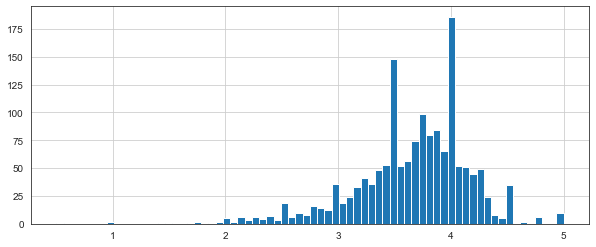

In [44]:
plt.figure(figsize=(10,4))
theratings['rating'].hist(bins=70)

In [58]:
moviemat = df.pivot_table(index='userId_x',columns='title',values='rating')
moviemat.head()
moviemat = df.pivot_table(index='userId_y',columns='title',values='rating')
moviemat.head()

title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
userId_y,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
theratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.197068,55567
Fight Club (1999),4.272936,11772
Star Wars: Episode IV - A New Hope (1977),4.231076,6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),4.018797,4655
2001: A Space Odyssey (1968),3.894495,4469
Eternal Sunshine of the Spotless Mind (2004),4.160305,4454
Inception (2010),4.066434,3718
"Big Lebowski, The (1998)",3.924528,3392
Donnie Darko (2001),3.981651,3161


In [61]:
pulpfiction_user_ratings = moviemat['Pulp Fiction (1994)']
pulpfiction_user_ratings.head()


userId_y
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [62]:
similar_to_pulpfiction = moviemat.corrwith(pulpfiction_user_ratings)

C:\Users\GPS\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\GPS\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [63]:
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction,columns=['Correlation'])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction.head()

,Correlation
title,
(500) Days of Summer (2009),-0.044034
...And Justice for All (1979),-0.188982
10 Cloverfield Lane (2016),-0.201347
10 Things I Hate About You (1999),-0.126206
101 Dalmatians (1996),0.289800


In [66]:
corr_pulpfiction.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Sure Thing, The (1985)",1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Staying Alive (1983),1.0
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Song of the Little Road (Pather Panchali) (1955),1.0
"Eyes of Tammy Faye, The (2000)",1.0
"Return, The (Vozvrashcheniye) (2003)",1.0
All the Real Girls (2003),1.0
Black Mirror: White Christmas (2014),1.0


In [67]:
corr_pulpfiction = corr_pulpfiction.join(theratings['num of ratings'])
corr_pulpfiction.head()

,Correlation,num of ratings
title,,
(500) Days of Summer (2009),-0.044034,336
...And Justice for All (1979),-0.188982,3
10 Cloverfield Lane (2016),-0.201347,28
10 Things I Hate About You (1999),-0.126206,54
101 Dalmatians (1996),0.289800,94


In [68]:
corr_pulpfiction[corr_pulpfiction['num of ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,55567
"Wolf of Wall Street, The (2013)",0.579915,270
Old Boy (2003),0.564115,312
Fight Club (1999),0.543465,11772
In the Mood For Love (Fa yeung nin wa) (2000),0.514500,252
